In [83]:
import pandas as pd

import os
import json

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import yaml


try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper

In [90]:
embed_dir = "../data/language_embeddings"

In [101]:
typ_dir = "../data/TypPred/"

In [ ]:
len(clics_langs), len(wn_langs), len(wn_concept_langs), len(uriel_langs)

In [91]:
with open(os.path.join(embed_dir, "clics_langs.json")) as f:
    clics_langs = json.load(f)

with open(os.path.join(embed_dir, "wn_langs.json")) as f:
    wn_langs = json.load(f)

with open(os.path.join(embed_dir, "wn_concept_langs.json")) as f:
    wn_concept_langs = json.load(f)

with open("../data/URIEL/uriel_learned_langs.json") as f:
    uriel_langs = json.load(f)


In [111]:
len(set(wals_langs)), len(clics_langs), len(wn_langs), len(wn_concept_langs), len(uriel_langs)

(2371, 1609, 519, 519, 1017)

In [118]:
with open(os.path.join(typ_dir, "wals_langs.json"), "w") as f:
    json.dump(list(set(wals_langs)), f)

In [104]:
with open(os.path.join(typ_dir, "wals+clics_langs.json"), "w") as f:
    json.dump(list(clics_wals), f)

In [112]:
clics_wals = set(clics_langs).intersection(set(wals_langs))
wn_wals = set(wn_langs).intersection(set(wals_langs))
wn_concept_wals = set(wn_concept_langs).intersection(set(wals_langs))
uriel_wals = set(uriel_langs).intersection(set(wals_langs))

In [114]:
with open(os.path.join(typ_dir, "wals+wn_langs.json"), "w") as f:
    json.dump(list(wn_wals), f)

In [115]:
with open(os.path.join(typ_dir, "wals+uriel_langs.json"), "w") as f:
    json.dump(list(uriel_wals), f)

In [116]:
with open(os.path.join(typ_dir, "wals+clics_langs.json"), "w") as f:
    json.dump(list(clics_wals), f)

In [113]:
len(clics_wals), len(wn_wals), len(wn_concept_wals), len(uriel_wals)

(737, 330, 330, 624)

In [120]:
wals_uriel_clics_wn_langs = set(wals_langs).intersection(set(clics_langs), set(wn_langs), set(wn_concept_langs), set(uriel_langs) )

In [119]:
with open(os.path.join(typ_dir, "wals+uriel+clics+wn_langs.json"), "w") as f:
    json.dump(list(inter_all), f)

In [121]:
len(wals_uriel_clics_wn_langs)

74

In [49]:
wals_file = "../data/wals_by_language.tsv"

In [39]:
data_dir = "../data/TypPred/preprocessed"

In [84]:
with open(os.path.join(data_dir, "wals_features.yaml")) as f:
    features_dict = yaml.load(f, Loader)

In [127]:
drop_cols = ["WALS-ID","Glottocode", "Name", "Family", "Latitude", "Longitude"]

In [122]:
df_inter= df_wals[df_wals["ISO"].isin(wals_uriel_clics_wn_langs)]

In [132]:
df_inter_iso df_inter.columns

Index(['WALS-ID', 'ISO', 'Name', 'Glottocode', 'Family', 'Latitude',
       'Longitude', 'Consonant Inventories', 'Vowel Quality Inventories',
       'Consonant-Vowel Ratio',
       ...
       'NegSOV Order', 'SNegOV Order', 'SONegV Order', 'SOVNeg Order',
       'The Position of Negative Morphemes in Verb-Initial Languages',
       'Double negation in verb-initial languages',
       'Verb-Initial with Preverbal Negative',
       'Verb-Initial with Negative that is Immediately Postverbal or between Subject and Object',
       'Verb-Initial with Clause-Final Negative',
       'The Position of Negative Morphemes in Object-Initial Languages'],
      dtype='object', length=199)

In [138]:
df_inter_iso = df_inter.drop(columns=drop_cols)

In [172]:
df_inter_iso = df_inter_iso.sort_values(by="NON_NULL", ascending=False).drop_duplicates(subset=["ISO"], keep="first")

In [161]:
df_inter_iso["NON_NULL"] = df_inter_iso.notnull().sum(axis=1)

In [174]:
df_inter_iso[df_inter_iso["ISO"]=="hye"]

,ISO,Consonant Inventories,Vowel Quality Inventories,Consonant-Vowel Ratio,Voicing in Plosives and Fricatives,Voicing and Gaps in Plosive Systems,Uvular Consonants,Glottalized Consonants,Lateral Consonants,The Velar Nasal,...,SNegOV Order,SONegV Order,SOVNeg Order,The Position of Negative Morphemes in Verb-Initial Languages,Double negation in verb-initial languages,Verb-Initial with Preverbal Negative,Verb-Initial with Negative that is Immediately Postverbal or between Subject and Object,Verb-Initial with Clause-Final Negative,The Position of Negative Morphemes in Object-Initial Languages,NON_NULL
140,hye,Moderately large,Average (5-6),Moderately high,In fricatives alone,Other,Uvular continuants only,Ejectives only,"/l/, no obstruent laterals",No velar nasal,...,No SNegOV,Type 1 / Type 2,NoSOVNeg,NaN,NaN,NaN,NaN,NaN,NaN,130


In [149]:
groups = df_inter_iso[df_inter_iso["ISO"]=="hye"]


None                                    6
Other                                   5
No dominant order                       3
No applicative construction             2
No inclusive/exclusive                  2
                                       ..
Additive-quantitatively asymmetrical    1
5 cases                                 1
No person marking                       1
Binary politeness distinction           1
NoSOVNeg                                1
Name: 140, Length: 112, dtype: int64

In [ ]:
df

In [107]:
wals_langs = df_wals["ISO"].dropna().tolist()

In [108]:
len(wals_langs)

2551

In [50]:
df_wals = pd.read_csv(wals_file, sep="\t")

In [63]:
with open(os.path.join(data_dir, "wals_uriel_clics_wn.json")) as f:
    wals_uriel_clics_wn_langs = json.load(f)

In [80]:
df_inter.columns.tolist()

['WALS-ID',
 'ISO',
 'Name',
 'Glottocode',
 'Family',
 'Latitude',
 'Longitude',
 'Consonant_Inventories',
 'Vowel_Quality_Inventories',
 'Consonant-Vowel_Ratio',
 'Voicing_in_Plosives_and_Fricatives',
 'Voicing_and_Gaps_in_Plosive_Systems',
 'Uvular_Consonants',
 'Glottalized_Consonants',
 'Lateral_Consonants',
 'The_Velar_Nasal',
 'Vowel_Nasalization',
 'Nasal_Vowels_in_West_Africa',
 'Front_Rounded_Vowels',
 'Syllable_Structure',
 'Tone',
 'Fixed_Stress_Locations',
 'Weight-Sensitive_Stress',
 'Weight_Factors_in_Weight-Sensitive_Stress_Systems',
 'Rhythm_Types',
 'Absence_of_Common_Consonants',
 'Presence_of_Uncommon_Consonants',
 'Fusion_of_Selected_Inflectional_Formatives',
 'Exponence_of_Selected_Inflectional_Formatives',
 'Exponence_of_Tense-Aspect-Mood_Inflection',
 'Inflectional_Synthesis_of_the_Verb',
 'Locus_of_Marking_in_the_Clause',
 'Locus_of_Marking_in_Possessive_Noun_Phrases',
 'Locus_of_Marking:_Whole-language_Typology',
 'Zero_Marking_of_A_and_P_Arguments',
 'Prefixi

In [73]:
df_inter["Hand and Arm"].value_counts()

Different    14
Identical     8
Name: Hand and Arm, dtype: int64

In [74]:
df_inter["Finger and Hand"].value_counts()

Different    22
Name: Finger and Hand, dtype: int64

In [42]:
df_train = pd.read_csv(os.path.join(data_dir, "train.csv"), index_col=0)
df_dev= pd.read_csv(os.path.join(data_dir, "dev.csv"), index_col=0)
df_test = pd.read_csv(os.path.join(data_dir, "test.csv"), index_col=0)

In [88]:
df_test

,name,latitude,longitude,genus,family,countrycodes,Consonant_Inventories,Vowel_Quality_Inventories,Consonant-Vowel_Ratio,Voicing_in_Plosives_and_Fricatives,...,Reason_Clauses,Action_Nominal_Constructions,Multiple_Negative_Constructions_in_SVO_Languages,Conjunctions_and_Universal_Quantifiers,"Genitives,_Adjectives_and_Relative_Clauses",Obligatory_Double_Negation_in_SOV_languages,Obligatory_Double_Negation,Double_negation_in_verb-initial_languages,Internally-headed_relative_clauses,Optional_Double_Negation_in_SVO_languages
wals_code,,,,,,,,,,,,,,,,,,,,,
cub,Cubeo,1.333333,-70.500000,Tucanoan,Tucanoan,US,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
des,Desano,0.833333,-69.833333,Tucanoan,Tucanoan,US,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dhb,Dharumbal,-22.750000,150.500000,Northern Pama-Nyungan,Pama-Nyungan,US,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
din,Dinka,8.500000,28.000000,Nilotic,Eastern Sudanic,US,0.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dja,Djabugay,-16.750000,145.583333,Northern Pama-Nyungan,Pama-Nyungan,US,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zaz,Zazaki,39.000000,41.000000,Iranian,Indo-European,TR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zen,Zenaga,17.333333,-16.000000,Berber,Afro-Asiatic,MR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zhn,Zhuang (Northern),24.000000,108.000000,Kam-Tai,Tai-Kadai,CN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
train_langs = df_train.index.dropna().tolist()
dev_langs = df_dev.index.dropna().tolist()
test_langs = df_test.index.dropna().tolist()

In [175]:
len(test_langs), len(train_langs), len(dev_langs)

(148, 1208, 83)

In [181]:
148 / (148+1208+83), 83/(148+1208+83)

(0.10284920083391244, 0.057678943710910355)

In [178]:
wals2iso = {k:v for k,v in zip(df_wals["WALS-ID"], df_wals["ISO"])}

In [189]:
test_langs_iso = [wals2iso.get(x,np.nan) for x in test_langs]
train_langs_iso = [wals2iso.get(x,np.nan) for x in train_langs]
dev_langs_iso = [wals2iso.get(x,np.nan) for x in dev_langs]

In [206]:
df_iso_family = df_wals[["ISO", "Family"]].dropna()

In [190]:
test_langs_iso = [x for x in test_langs_iso if x is not np.nan]
dev_langs_iso = [x for x in dev_langs_iso if x is not np.nan]
train_langs_iso = [x for x in train_langs_iso if x is not np.nan]

In [207]:
iso2family = {k:v for k,v in zip(df_iso_family["ISO"], df_iso_family["Family"])}

In [232]:
language_df = pd.read_csv("../data/cldf-datasets-wals-878ea47/raw/languagesMSD_22-09.csv")

In [209]:
with open("../data/TypPred/iso2family.json", "w") as f:
    json.dump(iso2family, f)

In [208]:
iso2family

{'aiw': 'Afro-Asiatic',
 'aau': 'Sepik',
 'shu': 'Afro-Asiatic',
 'abi': 'Niger-Congo',
 'apc': 'Afro-Asiatic',
 'abv': 'Afro-Asiatic',
 'axb': 'Guaicuruan',
 'abk': 'Northwest Caucasian',
 'akz': 'Muskogean',
 'ard': 'Pama-Nyungan',
 'arv': 'Afro-Asiatic',
 'kgr': 'West Papuan',
 'abz': 'Timor-Alor-Pantar',
 'abe': 'Algic',
 'abq': 'Northwest Caucasian',
 'ace': 'Austronesian',
 'aca': 'Arawakan',
 'guq': 'Tupian',
 'acr': 'Mayan',
 'ach': 'Eastern Sudanic',
 'acv': 'Hokan',
 'acn': 'Sino-Tibetan',
 'kjq': 'Keresan',
 'acu': 'Jivaroan',
 'ads': 'other',
 'adn': 'Timor-Alor-Pantar',
 'adj': 'Niger-Congo',
 'adt': 'Pama-Nyungan',
 'ady': 'Northwest Caucasian',
 'adz': 'Austronesian',
 'ale': 'Eskimo-Aleut',
 'arz': 'Afro-Asiatic',
 'ayl': 'Afro-Asiatic',
 'afr': 'Indo-European',
 'agd': 'Trans-New Guinea',
 'agb': 'Niger-Congo',
 'agt': 'Austronesian',
 'duo': 'Austronesian',
 'agq': 'Niger-Congo',
 'agx': 'Nakh-Daghestanian',
 'aoa': 'other',
 'agr': 'Jivaroan',
 'lnj': 'Pama-Nyungan',

In [216]:
train_family = list(set([x for x in [iso2family.get(x, np.nan) for x in train_langs_iso ] if x is not np.nan]))
dev_family = list(set([x for x in [iso2family.get(x, np.nan) for x in dev_langs_iso ] if x is not np.nan]))
test_family = list(set([x for x in [iso2family.get(x, np.nan) for x in test_langs_iso ] if x is not np.nan]))

In [218]:
test_family

['Trans-New Guinea',
 'Kxa',
 'Penutian',
 'Yámana',
 'Yele',
 'Austronesian',
 'Uto-Aztecan',
 'Cariban',
 'Altaic',
 'Sino-Tibetan',
 'Tai-Kadai',
 'Yangmanic',
 'Gunwinyguan',
 'Nyulnyulan',
 'Indo-European',
 'Hokan',
 'Niger-Congo',
 'Iroquoian',
 'Yukaghir',
 'Eastern Sudanic',
 'Afro-Asiatic',
 'Tu',
 'Mayan',
 'Mande',
 'Pama-Nyungan',
 'Eskimo-Aleut',
 'Tucanoan',
 'Macro-Ge',
 'Algic',
 'Songhay',
 'Uralic',
 'Arawakan']

In [219]:
d = {"train":train_langs_iso, "dev":dev_langs_iso, "test":test_langs_iso, "family":{"train": train_family, "dev":dev_family, "test":test_family}}

In [220]:
with open("../data/TypPred/data_split_st2020.json", "w") as f:
    json.dump(d,f)

In [193]:
total = test_langs_iso+dev_langs_iso+train_langs_iso

In [198]:
total = set(total).difference(set(wals_uriel_clics_wn_langs))

In [197]:
len(total), len(inter_langs)

(1373, 65)

In [234]:
rest_langs = set(wals_langs).difference(set(wals_uriel_clics_wn_langs))

In [235]:
len(rest_langs)

2297

In [239]:
df_wals_rest = df_wals[df_wals["ISO"].isin(rest_langs)]

In [244]:
df_wals_rest.drop(columns=["Family"], inplace=True)

In [245]:
df_wals_rest.to_csv("../data/TypPred/train_dev.csv", index=False)

In [5]:
sns.set_theme(style="darkgrid", font_scale=0.8)

In [223]:
df_wals = pd.read_csv("../data/TypPred/wals_by_languages.csv")

In [224]:
len(df_wals)

2371

In [225]:
df_wals = df_wals[df_wals["ISO"].isin(rest_langs)]

In [229]:
df_train=df_wals[df_wals["Family"].isin(train_family)]
df_test=df_wals[df_wals["Family"].isin(test_family)]


In [231]:
df_train

,ISO,Family,Consonant_Inventories,Vowel_Quality_Inventories,Consonant-Vowel_Ratio,Voicing_in_Plosives_and_Fricatives,Voicing_and_Gaps_in_Plosive_Systems,Uvular_Consonants,Glottalized_Consonants,Lateral_Consonants,...,SNegOV_Order,SONegV_Order,SOVNeg_Order,The_Position_of_Negative_Morphemes_in_Verb-Initial_Languages,Double_negation_in_verb-initial_languages,Verb-Initial_with_Preverbal_Negative,Verb-Initial_with_Negative_that_is_Immediately_Postverbal_or_between_Subject_and_Object,Verb-Initial_with_Clause-Final_Negative,The_Position_of_Negative_Morphemes_in_Object-Initial_Languages,NON_NULL
0,eng,Indo-European,Average,Large (7-14),Low,In both plosives and fricatives,None missing in /p t k b d g/,None,No glottalized consonants,"/l/, no obstruent laterals",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161
10,cmn,Sino-Tibetan,Average,Average (5-6),Average,In fricatives alone,Other,None,No glottalized consonants,"/l/, no obstruent laterals",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155
12,aey,Trans-New Guinea,Moderately small,Average (5-6),Average,In plosives alone,Missing /p/,None,No glottalized consonants,"/l/, no obstruent laterals",...,OptDoubleNeg,Word&OptDoubleNeg,Suffix&OptDoubleNeg,NaN,NaN,NaN,NaN,NaN,NaN,152
13,kat,Kartvelian,Moderately large,Average (5-6),Moderately high,In both plosives and fricatives,Other,Uvular stops and continuants,Ejectives only,"Laterals, but no /l/, no obstruent laterals",...,No SNegOV,Word&NoDoubleNeg,NoSOVNeg,NaN,NaN,NaN,NaN,NaN,NaN,152
14,lez,Nakh-Daghestanian,Large,Average (5-6),High,In both plosives and fricatives,None missing in /p t k b d g/,Uvular stops and continuants,Ejectives only,"/l/, no obstruent laterals",...,No SNegOV,No SONegV,Suffix&NoDoubleNeg,NaN,NaN,NaN,NaN,NaN,NaN,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,ttc,Mayan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2365,gdb,Dravidian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2366,cks,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2367,gbb,Pama-Nyungan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [230]:
len(df_train), len(df_test)

(1963, 1525)

In [2]:
df = pd.read_csv("../output/results/clics_metrics_nodeEmb_test.csv")

In [7]:
df.rename(columns = {"Unnamed: 0":"Model"}, inplace=True)

In [9]:
df.columns

Index(['Model', 'NodeEmb', 'Metric', 'Complex_Sentences', 'Lexicon',
       'Morphology', 'Nominal_Categories', 'Nominal_Syntax', 'Phonology',
       'Simple_Cluases', 'Verbal_Categories', 'Word_Order'],
      dtype='object')

In [10]:
features = ['Complex_Sentences', 'Lexicon',
       'Morphology', 'Nominal_Categories', 'Nominal_Syntax', 'Phonology',
       'Simple_Cluases', 'Verbal_Categories', 'Word_Order']

In [24]:
sorted(df["Lexicon"])

[0.3739,
 0.376,
 0.4127,
 0.4232,
 0.4259,
 0.4354,
 0.4519,
 0.4624,
 0.479,
 0.4803,
 0.5026,
 0.5069,
 0.5096,
 0.51,
 0.5153,
 0.517,
 0.5276,
 0.539,
 0.5541,
 0.5645,
 0.5805,
 0.6122,
 0.6356,
 0.6398,
 0.657]

In [30]:
df["avg"]= df[features].mean(axis=1).round(4)

In [35]:
df.sort_values(by=["Lexicon"], ascending=False)

,Model,NodeEmb,Metric,Complex_Sentences,Lexicon,Morphology,Nominal_Categories,Nominal_Syntax,Phonology,Simple_Cluases,Verbal_Categories,Word_Order,avg
24,clics_prone_concat+sum,prone,concat+sum,NaN,0.6570,0.4328,0.3447,NaN,0.4885,NaN,0.4598,NaN,0.4766
1,clics_glove_concat+avg,glove,concat+avg,0.5201,0.6398,0.2427,0.4244,0.3571,0.4143,0.4317,0.4756,0.4834,0.4432
10,random,NaN,NaN,0.6626,0.6356,0.4473,0.4950,0.5116,0.5440,0.4946,0.5719,0.5443,0.5452
9,clics_node2vec_add+sum,node2vec,add+sum,0.4082,0.6122,0.4005,0.3359,0.4792,0.4305,0.3937,0.4678,0.4333,0.4401
12,clics_glove_concat+max,glove,concat+max,0.4486,0.5805,0.3368,0.3924,0.4161,0.4787,0.4271,0.4143,0.4976,0.4436
13,clics_prone_add+avg,prone,add+avg,0.4741,0.5645,0.3087,0.4030,0.4943,0.4898,0.4099,0.5059,0.4655,0.4573
22,clics_node2vec_add+max,node2vec,add+max,0.5653,0.5541,0.3337,0.3780,0.5464,0.4911,0.3995,0.4787,0.4693,0.4685
2,clics_glove_add+sum,glove,add+sum,0.5357,0.5390,0.3581,0.3970,0.6054,0.4764,0.3705,0.4680,0.4336,0.4649
20,clics_node2vec_add+avg,node2vec,add+avg,0.5190,0.5276,0.3830,0.3233,0.6408,0.4359,0.4347,0.5074,0.4816,0.4726
8,clics_prone_add+sum,prone,add+sum,0.4422,0.5170,0.3359,0.3672,0.4196,0.4733,0.3364,0.4673,0.4811,0.4267


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: xlabel='NodeEmb', ylabel='Complex_Sentences'>

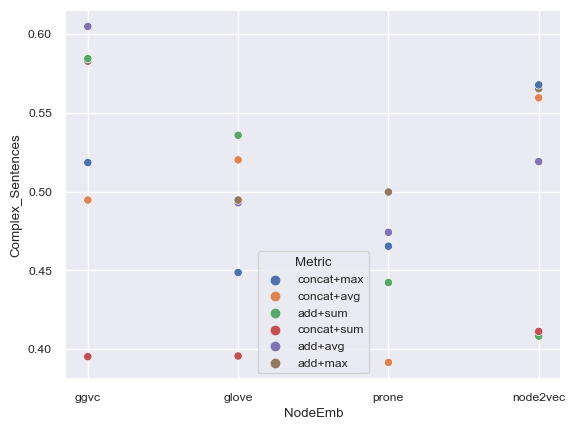

In [16]:
feature=features[0]
df_feature = df[["Model", "NodeEmb", "Metric", feature]]
plt.legend(loc='upper right')
sns.scatterplot(data=df_feature, y=feature, x = "NodeEmb", hue="Metric")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: xlabel='NodeEmb', ylabel='Lexicon'>

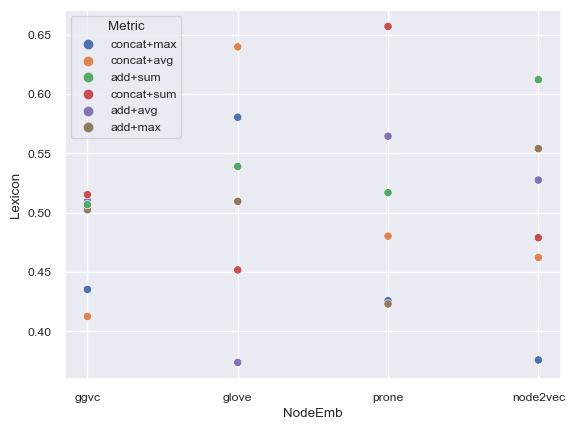

In [19]:
feature=features[1]
df_feature = df[["Model", "NodeEmb", "Metric", feature]]
plt.legend(loc='upper right')
sns.scatterplot(data=df_feature, y=feature, x = "NodeEmb", hue="Metric")